<font size='3'><b>Pizza Price EDA and Prediction</b></font>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [2]:
df=pd.read_csv('pizza_v2.csv')

In [3]:
#Basic info 
df.head()
df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [4]:
print(f'Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

Dataset contains 129 rows and 9 columns.


In [5]:
#Check duplicates adn null values 
df.isnull().sum()

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(2)

In [7]:
df=df.drop_duplicates()

In [8]:
#Replacing some columns 

In [9]:
df=df.rename({'price_rupiah':'price'},axis=1)

In [10]:
df['price']=df['price'].str.replace('Rp',"")

In [11]:
df['price']=df['price'].str.replace(",","").astype('int32')

In [12]:
df['diameter']=df['diameter'].str.replace(' inch',"")

In [13]:
df['diameter']=df['diameter'].astype('float')

In [14]:
df['price']=df['price']*0.0054

In [15]:
#Basic analysis in the dataset

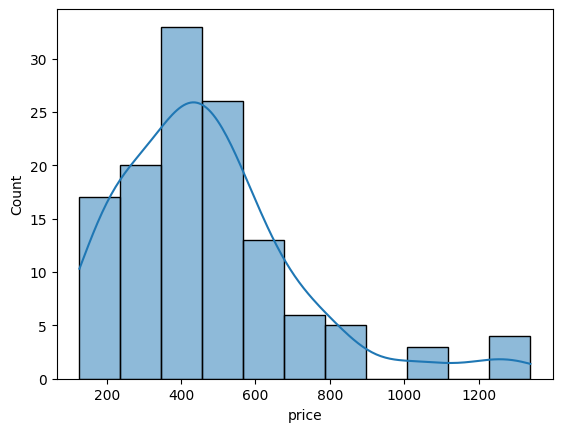

In [16]:
sns.histplot(data=df,x='price',kde=True)
plt.show()

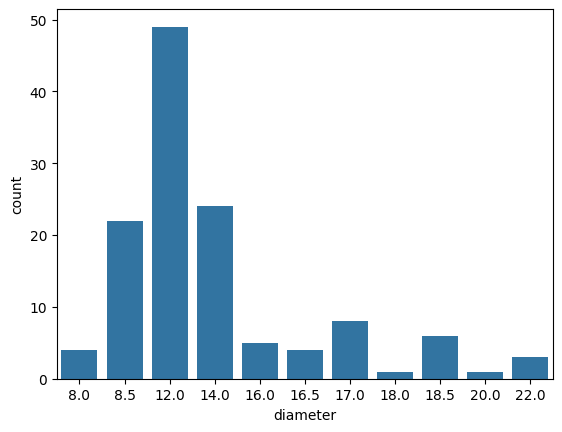

In [17]:
sns.countplot(data=df,x='diameter')
plt.show()

In [18]:
df['topping'].value_counts()

topping
chicken         28
mushrooms       22
mozzarella      20
smoked_beef     19
vegetables       9
tuna             9
meat             8
black_papper     3
beef             3
sausage          3
papperoni        2
onion            1
Name: count, dtype: int64

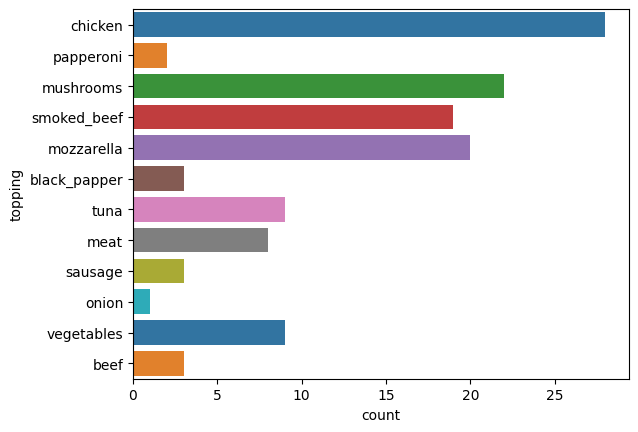

In [19]:
sns.countplot(data=df,y='topping',hue='topping',palette='tab10',legend=False)
plt.show()

In [20]:
df['variant'].value_counts()

variant
classic              30
meat_lovers          10
double_mix           10
crunchy              10
double_decker         9
new_york              8
double_signature      5
american_favorite     5
super_supreme         5
BBQ_meat_fiesta       5
spicy_tuna            3
BBQ_sausage           3
extravaganza          3
meat_eater            3
gournet_greek         3
italian_veggie        3
thai_veggie           3
american_classic      3
neptune_tuna          3
spicy tuna            3
Name: count, dtype: int64

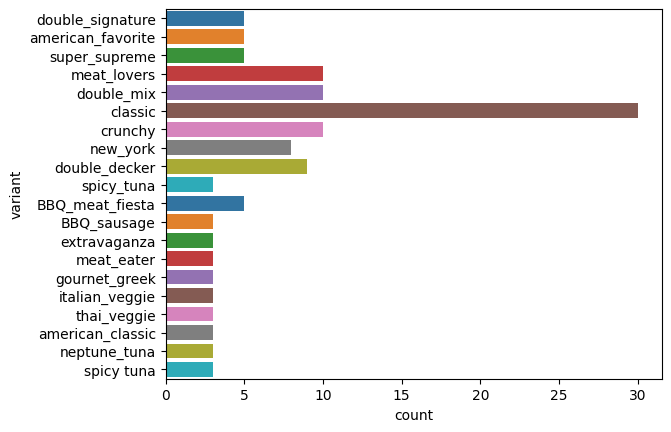

In [21]:
sns.countplot(data=df,y='variant',hue='variant',palette='tab10',legend=False)
plt.show()

In [22]:
df['size'].value_counts()

size
medium     41
small      22
large      21
reguler    20
jumbo      15
XL          8
Name: count, dtype: int64

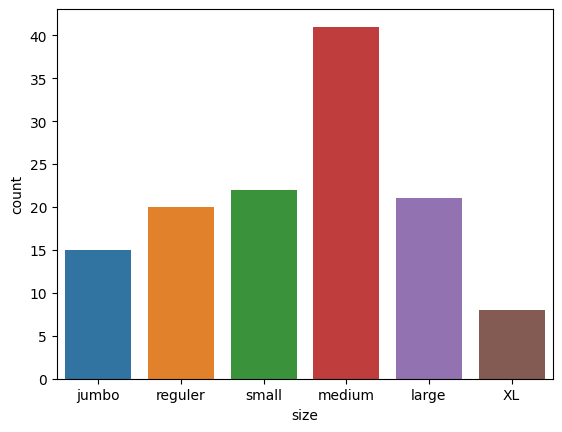

In [23]:
sns.countplot(data=df,x='size',hue='size',palette='tab10',legend=False)
plt.show()

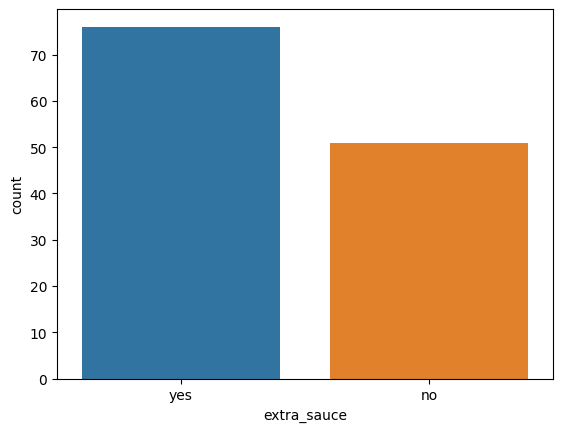

In [24]:
sns.countplot(x=df['extra_sauce'],hue=df['extra_sauce'],palette='tab10',legend=False)
plt.show()

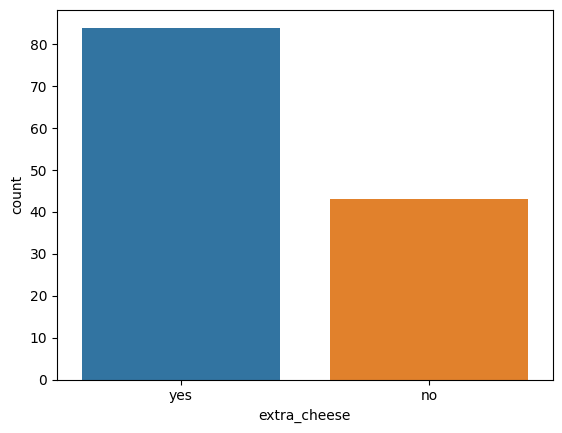

In [25]:
sns.countplot(x=df['extra_cheese'],hue=df['extra_cheese'],palette='tab10',legend=False)
plt.show()

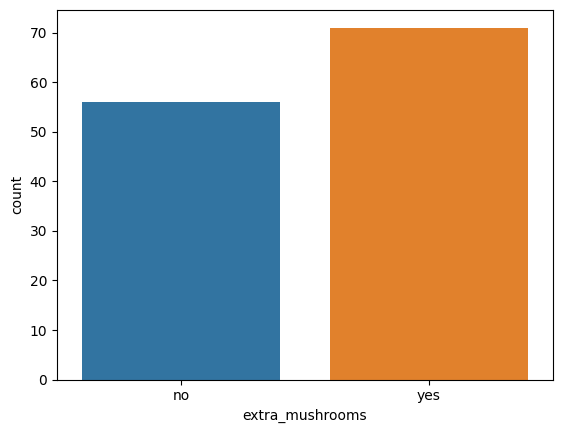

In [26]:
sns.countplot(x=df['extra_mushrooms'],hue=df['extra_mushrooms'],palette='tab10',legend=False)
plt.show()

In [27]:
#Bivariate Analysis 

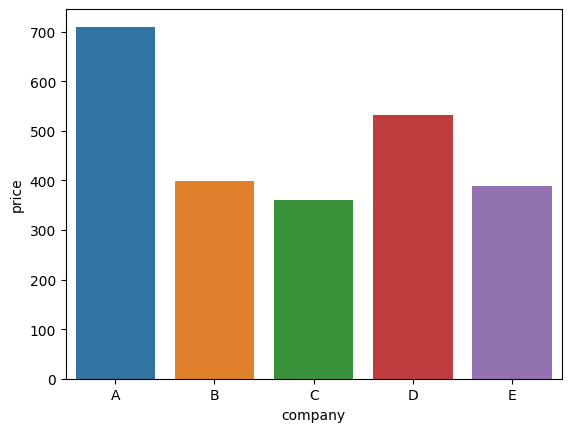

In [28]:
#Price by company
sns.barplot(data=df,x='company',y='price',hue='company',legend=False,palette='tab10',errorbar=None)
plt.show()

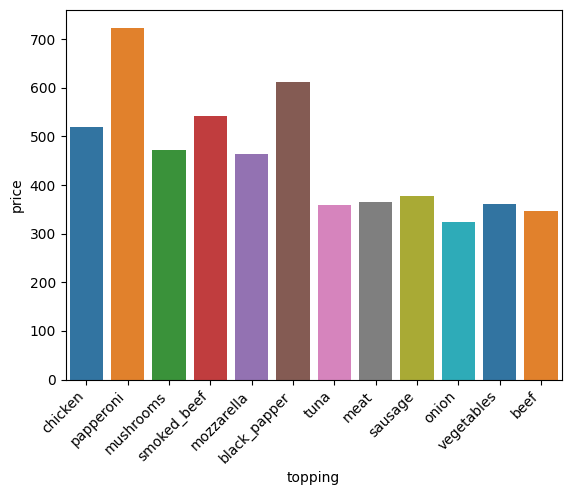

In [29]:
#Price by Topping 
sns.barplot(data=df,x='topping',y='price',hue='topping',legend=False,palette='tab10',errorbar=None)
plt.xticks(rotation=45,ha='right')
plt.show()

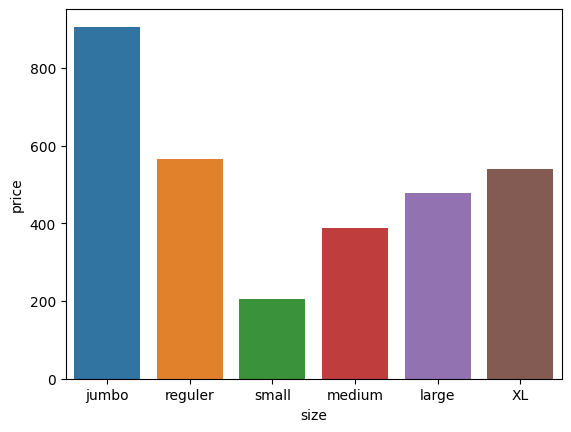

In [30]:
#Price by Size
sns.barplot(data=df,x='size',y='price',hue='size',legend=False,palette='tab10',errorbar=None)
plt.show()

In [31]:
#Find the most expensive pizza
df[df['price']==df['price'].max()]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [32]:
#Find diameters of jumbo size pizza 
df[df['size']=='jumbo']['diameter']

0     22.0
1     20.0
4     18.0
5     18.5
6     16.0
10    18.5
11    16.0
15    18.5
16    16.0
20    22.0
21    18.5
79    18.5
80    16.0
84    22.0
85    18.5
Name: diameter, dtype: float64

In [33]:
#Find diameters of XL size pizza 
df[df['size']=='XL']['diameter']

29     17.0
35     17.0
41     17.0
47     17.0
93     17.0
99     17.0
104    17.0
116    17.0
Name: diameter, dtype: float64

In [34]:
#Remove the outliers 
df[(df['size']=='jumbo')&(df['diameter']<=16)]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
6,A,594.0,16.0,smoked_beef,american_favorite,jumbo,no,yes,yes
11,A,594.0,16.0,black_papper,super_supreme,jumbo,yes,yes,no
16,A,594.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,yes
80,D,594.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,no


In [35]:
df=df.drop(df.index[[6,11,16,80]])

In [36]:
#Find cateorical columns 
cate_cols=df.select_dtypes(include=['object']).columns

In [37]:
from sklearn.preprocessing import LabelEncoder
#Topings is considered ordinal column

In [38]:
en=LabelEncoder()
for column in cate_cols:
    df[column]=en.fit_transform(df[column])

In [39]:
#Define X and target y

In [40]:
X=df.drop('price',axis=1)
y=df['price']

In [41]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics 

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
lr=LinearRegression().fit(X_train,y_train)
y_pred1=lr.predict(X_test)
lr_score=metrics.r2_score(y_test,y_pred1)

In [44]:
svr=SVR().fit(X_train,y_train)
y_pred2=svr.predict(X_test)
svr_score=metrics.r2_score(y_test,y_pred2)

In [45]:
rf=RandomForestRegressor().fit(X_train,y_train)
y_pred3=rf.predict(X_test)
rf_score=metrics.r2_score(y_test,y_pred3)

In [46]:
gb=GradientBoostingRegressor().fit(X_train,y_train)
y_pred4=gb.predict(X_test)
gb_score=metrics.r2_score(y_test,y_pred4)

In [47]:
xg=XGBRegressor().fit(X_train,y_train)
y_pred5=xg.predict(X_test)
xg_score=metrics.r2_score(y_test,y_pred5)

In [48]:
final_data=pd.DataFrame({"Model":['LR',"SVR",'RF',"GB","XGB"],
                        "R2_Score":[lr_score,svr_score,rf_score,gb_score,xg_score]})

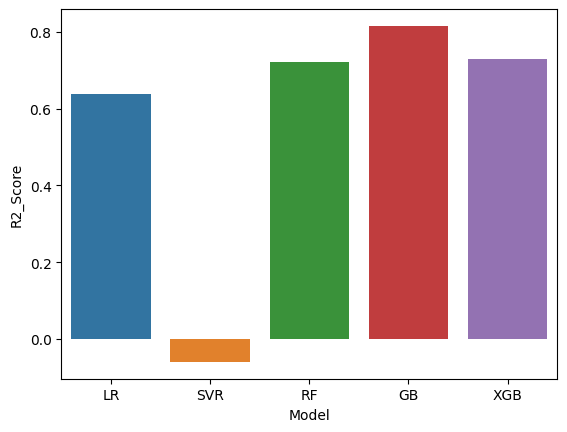

In [49]:
sns.barplot(data=final_data,x='Model',y='R2_Score',hue='Model',palette='tab10',legend=False)
plt.show()

In [50]:
#Final model and prediction.
model=GradientBoostingRegressor().fit(X,y)

In [51]:
df_1=pd.DataFrame({
    'company':1,
    'diameter':22.0,
    'topping':2,
    'variant':8,
    'size':1,
    'extra_sauce':1,
    'extra_cheese':1,
    'extra_mushrooms':1
},index=[0])

In [52]:
df_1

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,1,22.0,2,8,1,1,1,1


In [53]:
model.predict(df_1)

array([1254.96233769])